## Importing All Dependencies

In [16]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [17]:
# Import the requests library
import requests

# Import the API Key
from config import weather_api_key

## Generating List of Random Lats and Lngs

In [18]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Create a list for holding the cities
cities = []
coordinates = list(lat_lngs)

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

608

## Generating API Requests to get Info on the Random Coords

In [20]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [22]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning of Data Retrieval  ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)
        
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data Retrieval  
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | otane
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | volgorechensk
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | bogo
Processing Record 19 of Set 1 | waitati
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | harper
Processing Record 22 of Set 1 | kaduna
Process

Processing Record 34 of Set 4 | pevek
Processing Record 35 of Set 4 | gat
Processing Record 36 of Set 4 | kavieng
Processing Record 37 of Set 4 | chateaubelair
Processing Record 38 of Set 4 | temaraia
City not found. Skipping...
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | galashiels
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | campo de criptana
Processing Record 43 of Set 4 | krasnoselkup
Processing Record 44 of Set 4 | lasa
Processing Record 45 of Set 4 | maunabo
Processing Record 46 of Set 4 | heze
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | kaduqli
Processing Record 49 of Set 4 | maicao
Processing Record 50 of Set 4 | deputatskiy
Processing Record 1 of Set 5 | maragogi
Processing Record 2 of Set 5 | kelvington
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | paramonga
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | las cho

Processing Record 23 of Set 8 | mount isa
Processing Record 24 of Set 8 | nabire
Processing Record 25 of Set 8 | newport
Processing Record 26 of Set 8 | tateyama
Processing Record 27 of Set 8 | chapais
Processing Record 28 of Set 8 | yulara
Processing Record 29 of Set 8 | diamantino
Processing Record 30 of Set 8 | riachao das neves
Processing Record 31 of Set 8 | caxito
Processing Record 32 of Set 8 | olafsvik
Processing Record 33 of Set 8 | kushima
Processing Record 34 of Set 8 | keti bandar
Processing Record 35 of Set 8 | chara
Processing Record 36 of Set 8 | ust-nera
Processing Record 37 of Set 8 | shellbrook
Processing Record 38 of Set 8 | brawley
Processing Record 39 of Set 8 | evinayong
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | dohrighat
Processing Record 42 of Set 8 | chaihe
Processing Record 43 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | waingapu
Processing Record 46 of Se

Processing Record 8 of Set 12 | frontera
Processing Record 9 of Set 12 | coquimbo
Processing Record 10 of Set 12 | kerouane
Processing Record 11 of Set 12 | valparaiso
Processing Record 12 of Set 12 | vershino-darasunskiy
Processing Record 13 of Set 12 | lethem
Processing Record 14 of Set 12 | horta
Processing Record 15 of Set 12 | anzio
Processing Record 16 of Set 12 | sioux lookout
Processing Record 17 of Set 12 | josefina
Processing Record 18 of Set 12 | port hardy
Processing Record 19 of Set 12 | pemba
Processing Record 20 of Set 12 | shamsabad
Processing Record 21 of Set 12 | yen bai
Processing Record 22 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 12 | kushiro
Processing Record 24 of Set 12 | cairns
Processing Record 25 of Set 12 | karamay
City not found. Skipping...
Processing Record 26 of Set 12 | hendijan
City not found. Skipping...
Processing Record 27 of Set 12 | san rafael
Processing Record 28 of Set 12 | mimongo
Processing Record 29 of Set 12

In [23]:
# Checking Total Number of Cities
len(city_data)

548

## Converting to Pandas DataFrame

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.91,87,75,6.91,CL,2022-06-12 02:48:02
1,Busselton,-33.6500,115.3333,63.64,80,69,28.39,AU,2022-06-12 02:48:03
2,Cape Town,-33.9258,18.4232,63.12,71,0,8.99,ZA,2022-06-12 02:48:03
3,Taoudenni,22.6783,-3.9836,96.62,13,89,17.69,ML,2022-06-12 02:48:03
4,Albany,42.6001,-73.9662,62.06,78,59,2.71,US,2022-06-12 02:45:14
5,Bengkulu,-3.8004,102.2655,80.04,74,87,11.32,ID,2022-06-12 02:48:04
6,Hithadhoo,-0.6000,73.0833,83.86,72,100,12.06,MV,2022-06-12 02:48:05
7,Ushuaia,-54.8000,-68.3000,49.66,76,75,8.05,AR,2022-06-12 02:48:05
8,Saint George,37.1041,-113.5841,102.79,6,0,12.66,US,2022-06-12 02:48:06
9,Barrow,71.2906,-156.7887,32.02,80,100,12.66,US,2022-06-12 02:48:06


In [26]:
# Changing the column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

# Displaying the DataFrame with the new column order
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-06-12 02:48:02,-53.1500,-70.9167,42.91,87,75,6.91
1,Busselton,AU,2022-06-12 02:48:03,-33.6500,115.3333,63.64,80,69,28.39
2,Cape Town,ZA,2022-06-12 02:48:03,-33.9258,18.4232,63.12,71,0,8.99
3,Taoudenni,ML,2022-06-12 02:48:03,22.6783,-3.9836,96.62,13,89,17.69
4,Albany,US,2022-06-12 02:45:14,42.6001,-73.9662,62.06,78,59,2.71
5,Bengkulu,ID,2022-06-12 02:48:04,-3.8004,102.2655,80.04,74,87,11.32
6,Hithadhoo,MV,2022-06-12 02:48:05,-0.6000,73.0833,83.86,72,100,12.06
7,Ushuaia,AR,2022-06-12 02:48:05,-54.8000,-68.3000,49.66,76,75,8.05
8,Saint George,US,2022-06-12 02:48:06,37.1041,-113.5841,102.79,6,0,12.66
9,Barrow,US,2022-06-12 02:48:06,71.2906,-156.7887,32.02,80,100,12.66


In [28]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

## Plotting Latitude vs Temperature

In [29]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [31]:
# Import the time module
import time

# Get today's date in seconds
today = time.time()

# Get today's date in easier to read notation
today = time.strftime('%x')
today

'06/14/22'

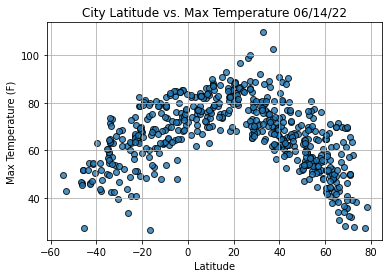

In [36]:
# Import the module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

## Plotting Latitude vs. Humidity

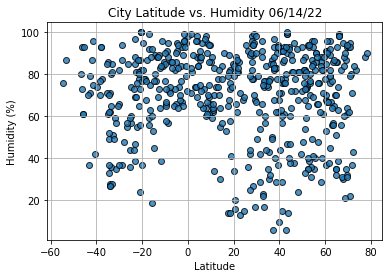

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = 'black', linewidth = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

## Plotting Latitude vs. Cloudiness

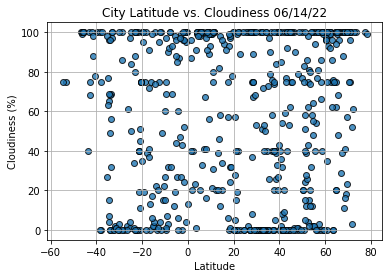

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = 'black', linewidth = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

## Plotting Latitude vs. Wind Speed

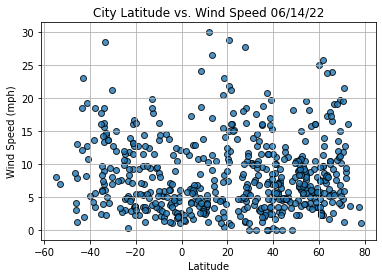

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = 'black', linewidth = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()